In [1]:
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import mglearn

pd.set_option('display.max_columns', 140) #最大表示列数の指定
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
train = pd.read_csv('../data/train.csv')
test = pd.read_csv('../data/test.csv')

In [3]:
train.head()
train.shape

test.head()
test.shape

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,Female,United-States,0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,Female,United-States,0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Female,United-States,0
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,Male,United-States,0
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,0


(11900, 13)

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,3873,17,Local-gov,132652,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States
1,3625,23,Private,132652,Some-college,10,Married-civ-spouse,Sales,Husband,White,Male,United-States
2,3028,19,Private,132652,11th,7,Never-married,Handlers-cleaners,Own-child,White,Female,United-States
3,13814,30,State-gov,132652,HS-grad,9,Never-married,Protective-serv,Unmarried,Black,Female,United-States
4,15398,60,Private,132652,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States


(5100, 12)

In [5]:
train.describe()
test.describe()

,index,age,fnlwgt,education-num,Y
count,11900.000000,11900.000000,11900.000000,11900.000000,11900.000000
mean,8474.659076,27.958319,130706.714118,10.384370,0.256134
std,4927.916370,9.563625,14218.695201,2.209696,0.436515
min,0.000000,17.000000,24694.000000,3.000000,0.000000
25%,4181.750000,20.000000,132652.000000,9.000000,0.000000
50%,8453.500000,24.000000,132652.000000,10.000000,0.000000
75%,12761.250000,34.000000,132652.000000,13.000000,1.000000
max,16997.000000,64.000000,132652.000000,16.000000,1.000000


,index,age,fnlwgt,education-num
count,5100.000000,5100.000000,5100.000000,5100.000000
mean,8557.462157,27.905686,131078.077647,10.409216
std,4859.924357,9.366789,12808.318785,2.247178
min,5.000000,17.000000,24694.000000,3.000000
25%,4428.750000,21.000000,132652.000000,9.000000
50%,8606.500000,24.000000,132652.000000,10.000000
75%,12726.500000,34.000000,132652.000000,13.000000
max,16999.000000,64.000000,132652.000000,16.000000


In [6]:
train['Y'].value_counts()

0    8852
1    3048
Name: Y, dtype: int64

In [7]:
train.isnull().sum()
test.isnull().sum()

index             0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
Y                 0
dtype: int64

index             0
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
native-country    0
dtype: int64

In [8]:
train['workclass'].unique()
cat_feats = [cat for cat in train.columns if train[cat].dtype == 'object']
cat_feats

array(['Private', 'State-gov', '?', 'Local-gov', 'Federal-gov',
       'Self-emp-inc', 'Self-emp-not-inc'], dtype=object)

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country']

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='workclass', ylabel='count'>

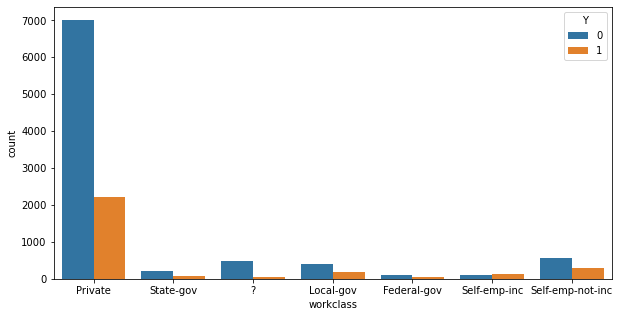

In [9]:
plt.figure(figsize=(10,5))
sns.countplot('workclass', data=train,hue='Y')

<Figure size 1080x360 with 0 Axes>

<AxesSubplot:xlabel='education', ylabel='count'>

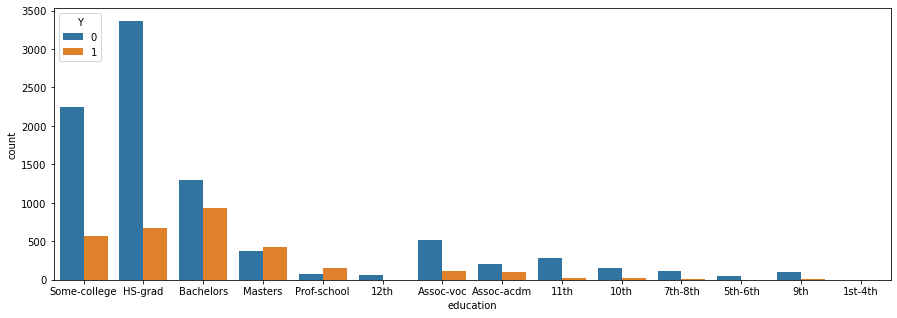

In [10]:
plt.figure(figsize=(15,5))
sns.countplot('education', data=train,hue='Y')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='marital-status', ylabel='count'>

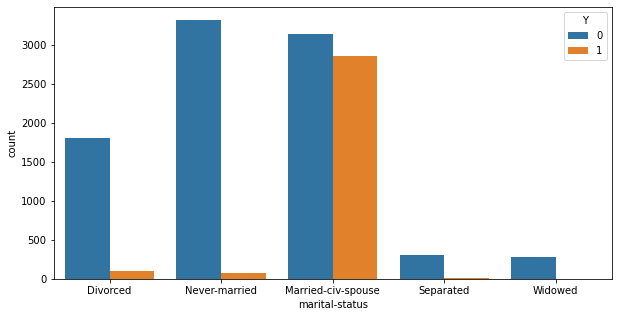

In [11]:
plt.figure(figsize=(10,5))
sns.countplot('marital-status', data=train,hue='Y')

<Figure size 1440x360 with 0 Axes>

<AxesSubplot:xlabel='occupation', ylabel='count'>

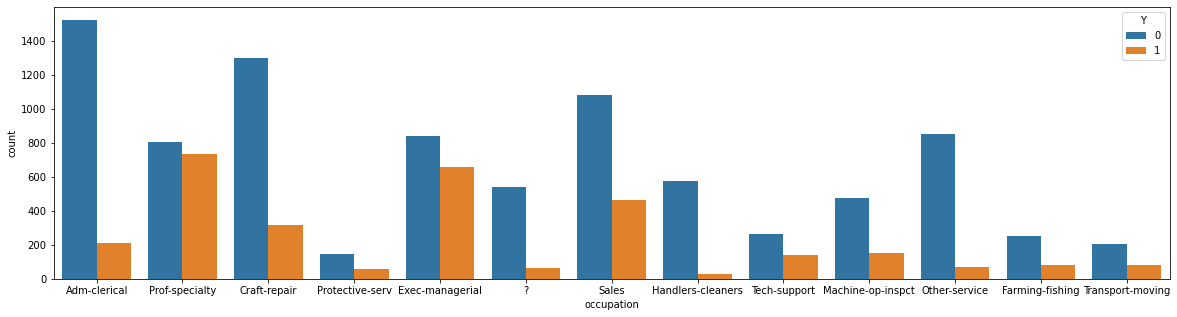

In [12]:
plt.figure(figsize=(20,5))
sns.countplot('occupation', data=train,hue='Y')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='relationship', ylabel='count'>

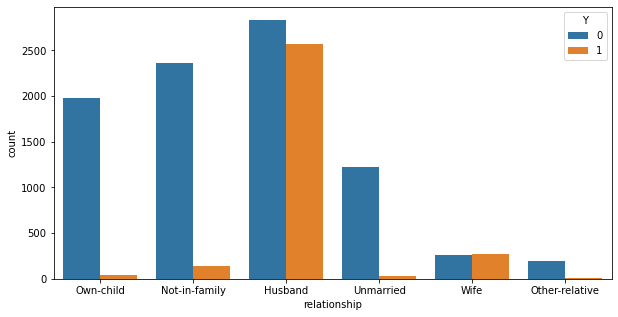

In [13]:
plt.figure(figsize=(10,5))
sns.countplot('relationship', data=train,hue='Y')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='race', ylabel='count'>

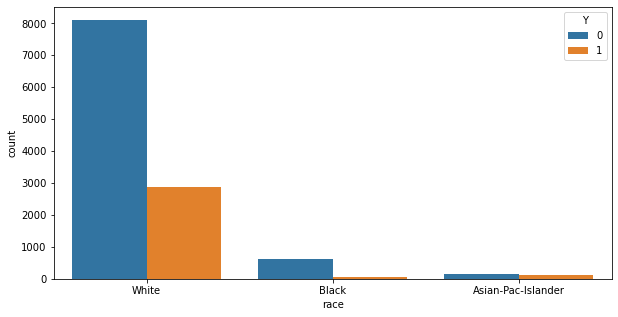

In [14]:
plt.figure(figsize=(10,5))
sns.countplot('race', data=train,hue='Y')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='sex', ylabel='count'>

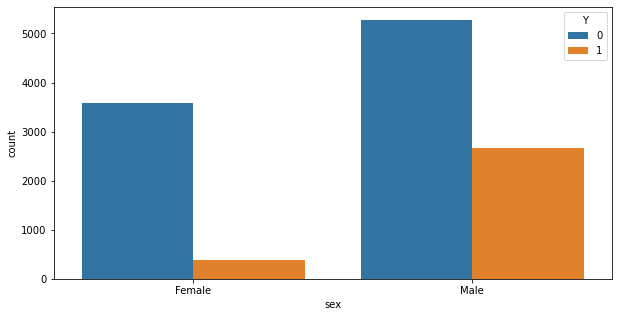

In [15]:
plt.figure(figsize=(10,5))
sns.countplot('sex', data=train,hue='Y')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='native-country', ylabel='count'>

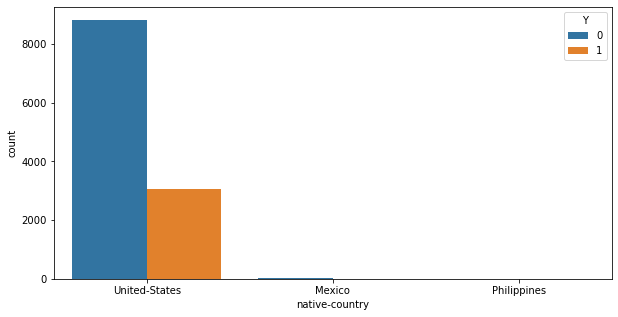

In [16]:
plt.figure(figsize=(10,5))
sns.countplot('native-country', data=train,hue='Y')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='count'>

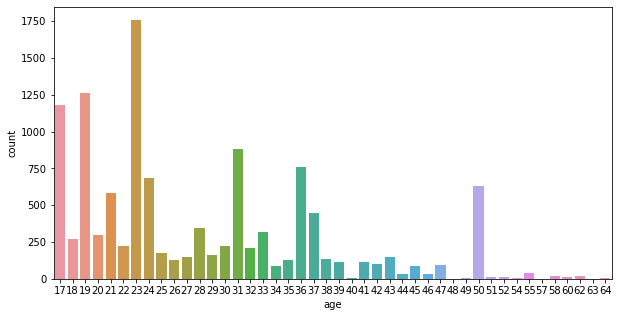

In [17]:
plt.figure(figsize=(10,5))
sns.countplot('age', data=train)

array([[<AxesSubplot:title={'center':'index'}>,
        <AxesSubplot:title={'center':'age'}>],
       [<AxesSubplot:title={'center':'fnlwgt'}>,
        <AxesSubplot:title={'center':'education-num'}>],
       [<AxesSubplot:title={'center':'Y'}>, <AxesSubplot:>]], dtype=object)

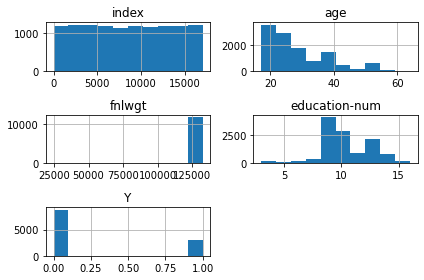

In [18]:
train.hist()
plt.tight_layout()
plt.show()

<AxesSubplot:>

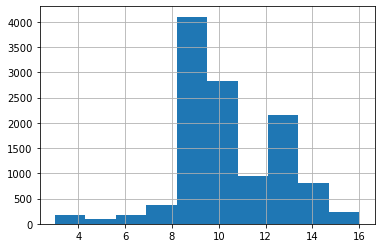

In [19]:
train['education-num'].hist()

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='education-num', ylabel='count'>

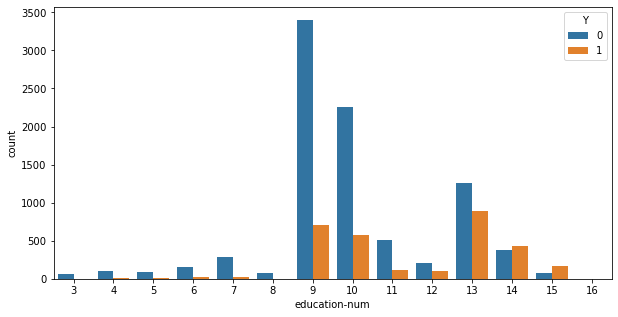

In [20]:
plt.figure(figsize=(10,5))
sns.countplot('education-num', data=train, hue='Y')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='count'>

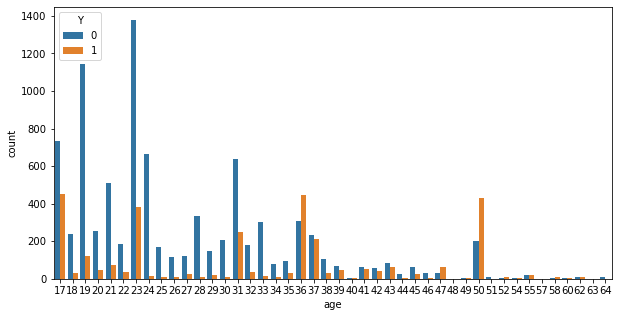

In [21]:
plt.figure(figsize=(10,5))
sns.countplot('age', data=train,hue='Y')

In [22]:
train['age'].mean()

27.958319327731093

In [23]:
train['age'].sort_values().unique()
len(train['age'].unique())

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 54, 55, 57, 58, 60, 62, 63, 64], dtype=int64)

44

In [24]:
test['age'].sort_values().unique()
len(test['age'].unique())

array([17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 49, 50, 51,
       52, 54, 55, 58, 60, 62, 64], dtype=int64)

41

In [25]:
# Menを1、Fmaleを0へ変換
train.loc[train['sex'] == 'Female', 'sex'] = 0
train.loc[train['sex'] == 'Male', 'sex'] = 1
test.loc[test['sex'] == 'Female', 'sex'] = 0
test.loc[test['sex'] == 'Male', 'sex'] = 1

In [26]:
train.head()
test.head()

,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,132652,Some-college,10,Divorced,Adm-clerical,Own-child,White,0,United-States,0
1,11968,29,Private,132652,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,0,United-States,0
2,10868,19,Private,132652,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,0,United-States,0
3,3394,17,Private,132652,HS-grad,9,Never-married,Craft-repair,Own-child,White,1,United-States,0
4,15993,47,Private,132652,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,1,United-States,0


,index,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,3873,17,Local-gov,132652,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,1,United-States
1,3625,23,Private,132652,Some-college,10,Married-civ-spouse,Sales,Husband,White,1,United-States
2,3028,19,Private,132652,11th,7,Never-married,Handlers-cleaners,Own-child,White,0,United-States
3,13814,30,State-gov,132652,HS-grad,9,Never-married,Protective-serv,Unmarried,Black,0,United-States
4,15398,60,Private,132652,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,United-States


In [27]:
train['fnlwgt'].unique()

array([132652,  24694,  34572], dtype=int64)

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='fnlwgt', ylabel='count'>

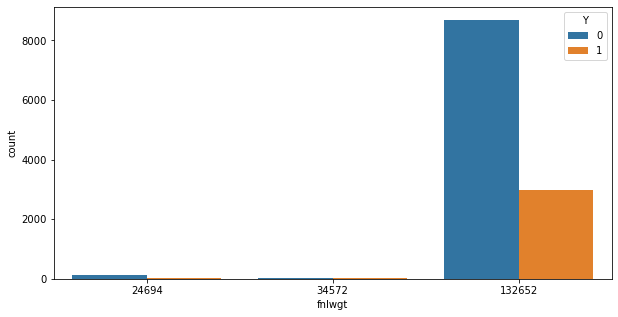

In [28]:
plt.figure(figsize=(10,5))
sns.countplot('fnlwgt', data=train, hue='Y')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='fnlwgt', ylabel='count'>

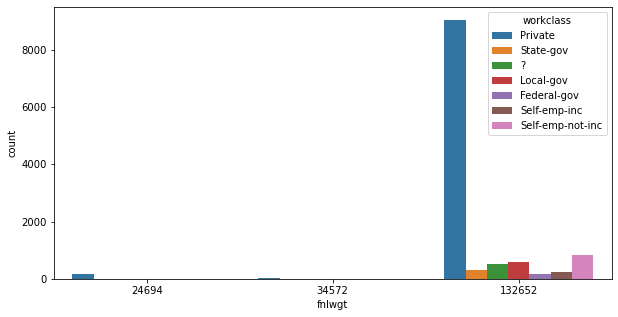

In [29]:
plt.figure(figsize=(10,5))
sns.countplot('fnlwgt', data=train, hue='workclass')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='fnlwgt', ylabel='count'>

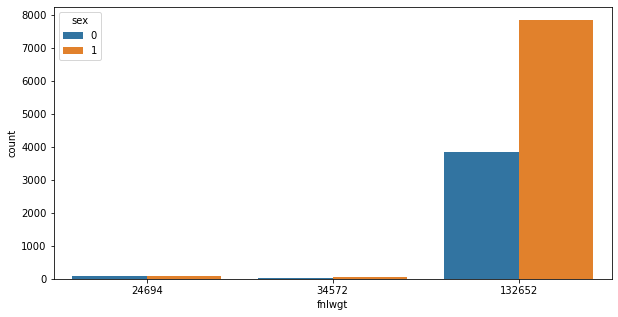

In [30]:
plt.figure(figsize=(10,5))
sns.countplot('fnlwgt', data=train, hue='sex')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='fnlwgt', ylabel='count'>

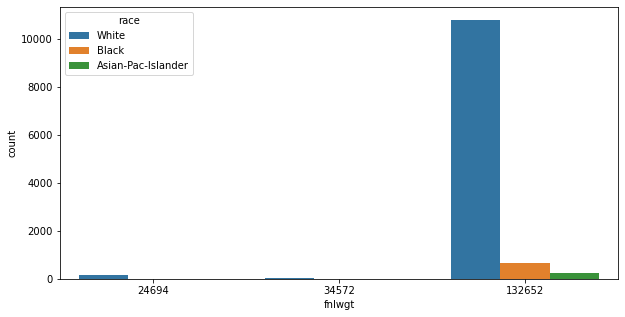

In [31]:
plt.figure(figsize=(10,5))
sns.countplot('fnlwgt', data=train, hue='race')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='fnlwgt', ylabel='count'>

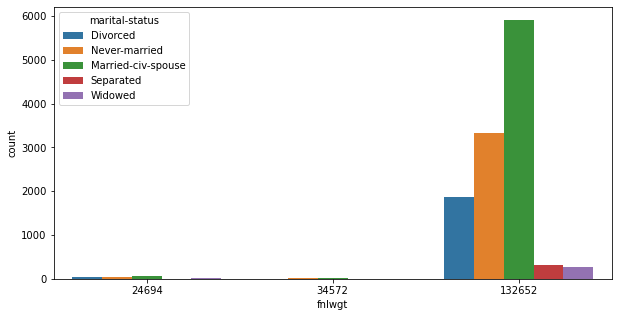

In [32]:
plt.figure(figsize=(10,5))
sns.countplot('fnlwgt', data=train, hue='marital-status')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='fnlwgt', ylabel='count'>

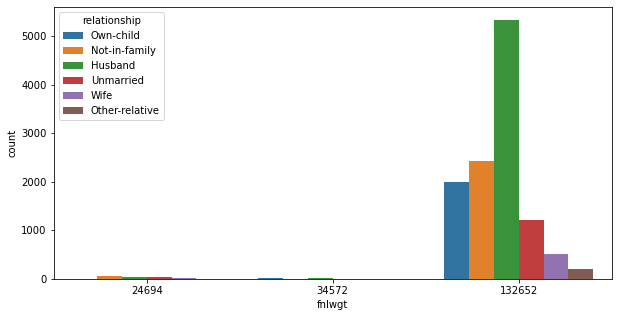

In [33]:
plt.figure(figsize=(10,5))
sns.countplot('fnlwgt', data=train, hue='relationship')

fnlwgt変数は除去してもよさそう？

In [34]:
train = train.drop('fnlwgt', axis=1)
train.head()

,index,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
0,322,21,Private,Some-college,10,Divorced,Adm-clerical,Own-child,White,0,United-States,0
1,11968,29,Private,HS-grad,9,Divorced,Adm-clerical,Not-in-family,White,0,United-States,0
2,10868,19,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,0,United-States,0
3,3394,17,Private,HS-grad,9,Never-married,Craft-repair,Own-child,White,1,United-States,0
4,15993,47,Private,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,1,United-States,0


In [35]:
test = test.drop('fnlwgt', axis=1)
test.head()

,index,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country
0,3873,17,Local-gov,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,1,United-States
1,3625,23,Private,Some-college,10,Married-civ-spouse,Sales,Husband,White,1,United-States
2,3028,19,Private,11th,7,Never-married,Handlers-cleaners,Own-child,White,0,United-States
3,13814,30,State-gov,HS-grad,9,Never-married,Protective-serv,Unmarried,Black,0,United-States
4,15398,60,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,1,United-States


<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='native-country', ylabel='count'>

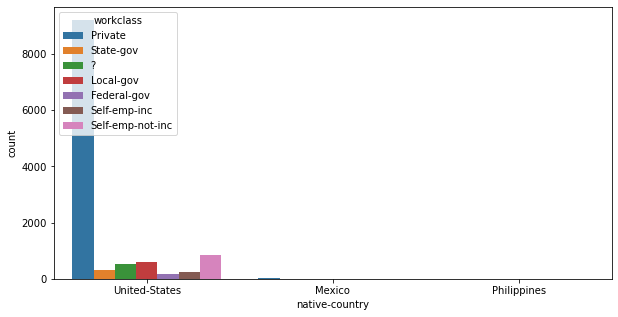

In [36]:
plt.figure(figsize=(10,5))
sns.countplot('native-country', data=train, hue='workclass')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='native-country', ylabel='count'>

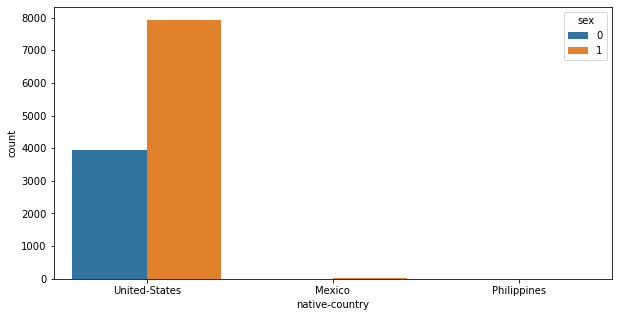

In [37]:
plt.figure(figsize=(10,5))
sns.countplot('native-country', data=train, hue='sex')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='race', ylabel='count'>

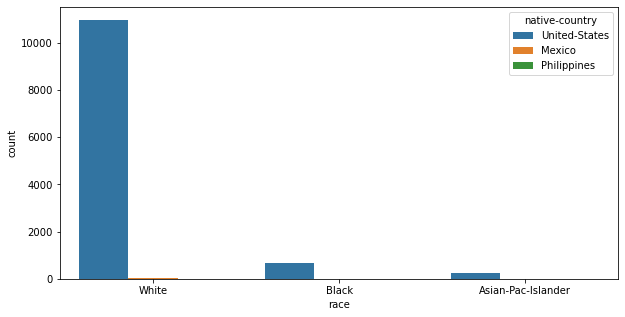

In [38]:
plt.figure(figsize=(10,5))
sns.countplot('race', data=train, hue='native-country')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='count'>

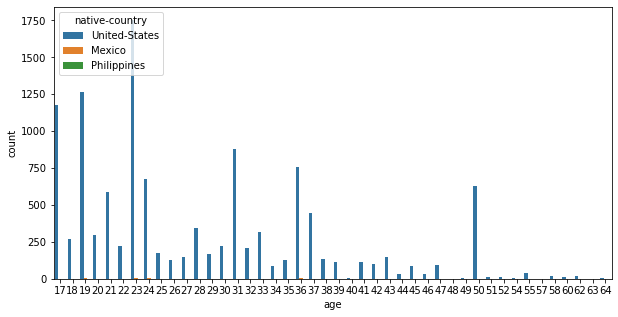

In [39]:
plt.figure(figsize=(10,5))
sns.countplot('age', data=train, hue='native-country')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='marital-status', ylabel='count'>

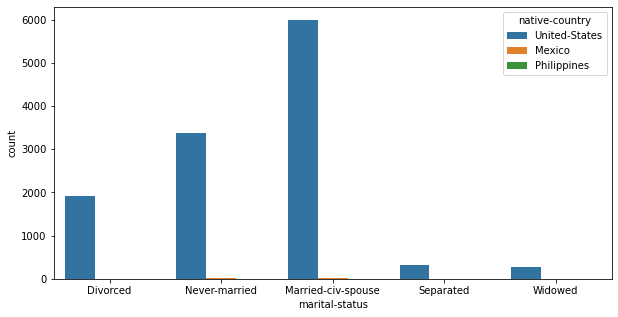

In [41]:
plt.figure(figsize=(10,5))
sns.countplot('marital-status', data=train, hue='native-country')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='native-country', ylabel='count'>

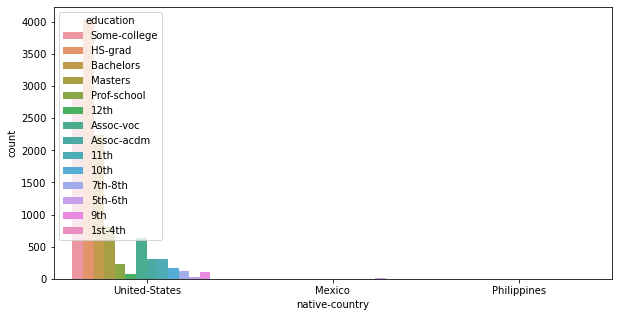

In [42]:
plt.figure(figsize=(10,5))
sns.countplot('native-country', data=train, hue='education')

In [43]:
not_US = train.loc[train['native-country'] != 'United-States']

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='education', ylabel='count'>

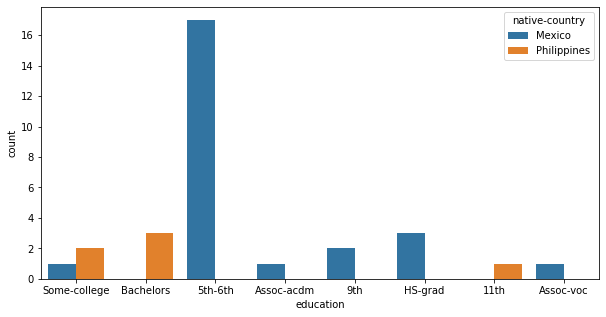

In [44]:
plt.figure(figsize=(10,5))
sns.countplot('education', data=not_US, hue='native-country')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='race', ylabel='count'>

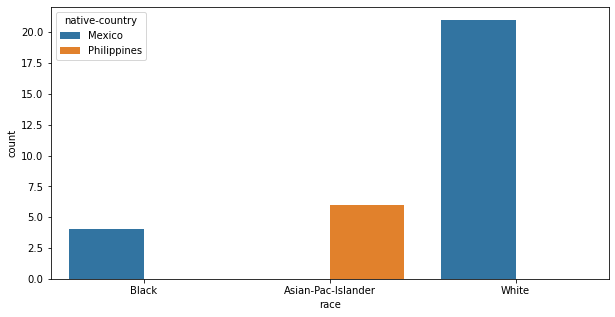

In [45]:
plt.figure(figsize=(10,5))
sns.countplot('race', data=not_US, hue='native-country')

<Figure size 720x360 with 0 Axes>

<AxesSubplot:xlabel='sex', ylabel='count'>

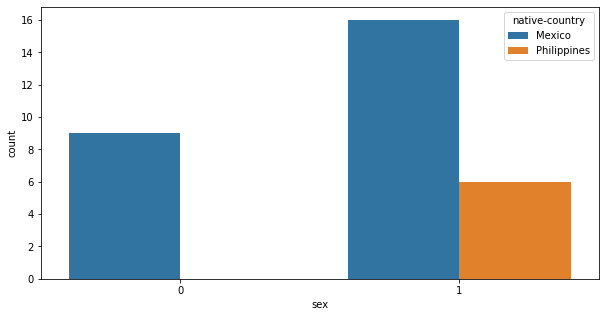

In [46]:
plt.figure(figsize=(10,5))
sns.countplot('sex', data=not_US, hue='native-country')

In [47]:
not_US.head()

,index,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,Y
534,6150,19,Private,Some-college,10,Divorced,Sales,Unmarried,Black,0,Mexico,0
569,1484,24,Private,Bachelors,13,Married-civ-spouse,Adm-clerical,Own-child,Asian-Pac-Islander,1,Philippines,0
1453,10718,23,Private,5th-6th,3,Married-civ-spouse,Machine-op-inspct,Husband,White,1,Mexico,0
1575,10684,31,Private,Bachelors,13,Never-married,Prof-specialty,Not-in-family,Asian-Pac-Islander,1,Philippines,0
2205,9477,50,Local-gov,5th-6th,3,Widowed,Exec-managerial,Not-in-family,White,0,Mexico,0


In [48]:
for col in train.columns:
    if len(train.loc[train[col] == '?', col]) > 0:
        print(col)
        print(len(train.loc[train[col] == '?', col]))

for col in test.columns:
    if len(test.loc[train[col] == '?', col]) > 0:
        print(col)
        print(len(test.loc[train[col] == '?', col]))

workclass
527
occupation
601
workclass
232
occupation
268


?を含む列はworkclassとoccupation